In [20]:
##0.Web(https://www.kaggle.com/jescawhite/customer-segmentation-using-k-means)
##1. Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.cluster import KMeans

In [21]:
##2. Reading and exploration of the data.
##('../input/Mall_Customers.csv')
data = pd.read_csv('E:/Rtest/Mall Customer Segmentation20190610/Mall_Customers2.csv')
data.shape

(200, 5)

In [22]:
data.head()

,CustomerID,Gender,Age,AnnualIncome (k$),SpendingScore (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
data.isnull().any()

CustomerID               False
Gender                   False
Age                      False
AnnualIncome (k$)        False
SpendingScore (1-100)    False
dtype: bool

In [24]:
uniq = data.CustomerID.unique()
len(uniq)

200

In [25]:
data.describe()

,CustomerID,Age,AnnualIncome (k$),SpendingScore (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [26]:
##3. Data Visualization.
data[['Gender','CustomerID']].groupby('Gender').count()

,CustomerID
Gender,
Female,112
Male,88


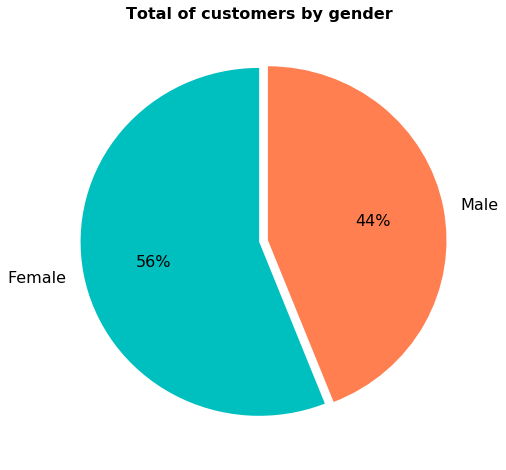

In [28]:
gender = data['Gender'].value_counts()
labels = ['Female', 'Male']
colors = ['c', 'coral']
explode = [0, 0.05]

plt.figure(figsize=(8,8))
plt.title('Total of customers by gender', fontsize = 16, fontweight='bold') 
plt.pie(gender, colors = colors, autopct = '%1.0f%%', labels = labels, explode = explode, startangle=90, textprops={'fontsize': 16})
plt.savefig('Total of customers by gender.png', bbox_inches = 'tight')
plt.show()

In [31]:
gender_spending = data[['CustomerID', 'SpendingScore (1-100)','Gender']].groupby('Gender').mean()
gender_spending

,CustomerID,SpendingScore (1-100)
Gender,,
Female,97.562500,51.526786
Male,104.238636,48.511364


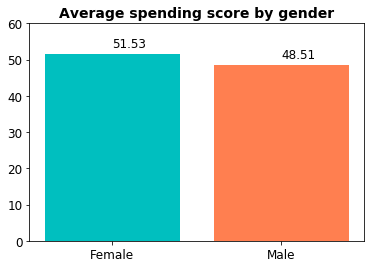

In [33]:
values = gender_spending['SpendingScore (1-100)'].values
genders = ['Female', 'Male']

plt.title('Average spending score by gender', fontsize = 14, fontweight='bold')
plt.bar(genders[0], values[0], color = 'c')
plt.bar(genders[1], values[1], color = 'coral')
plt.yticks(np.arange(0, max(values)+10, 10), fontsize = 12)
plt.xticks(fontsize = 12)
for i in range(len(values)):
    plt.text(x = genders[i], y = values[i] + 2, s = round(values[i],2), size = 12)
plt.savefig('Average spending score by gender.png')
plt.show()    

In [34]:
ages = data[['Age']].describe()
ages

,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


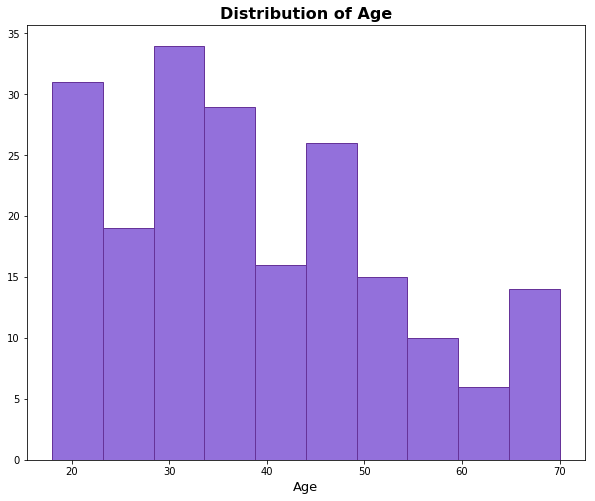

In [35]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Age', fontsize = 16, fontweight='bold')
plt.hist(data['Age'], color = 'mediumpurple', edgecolor = 'rebeccapurple')
plt.xlabel('Age', fontsize = 13)
plt.savefig('Distribution of Age.png', bbox_inches = 'tight')
plt.grid(False)

In [37]:
income = data[['AnnualIncome (k$)']].describe()
income

,AnnualIncome (k$)
count,200.000000
mean,60.560000
std,26.264721
min,15.000000
25%,41.500000
50%,61.500000
75%,78.000000
max,137.000000


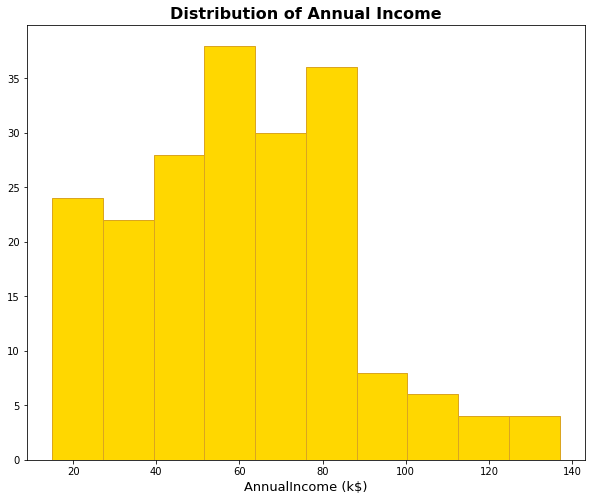

In [39]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Annual Income', fontsize = 16, fontweight='bold')
plt.hist(data['AnnualIncome (k$)'], color = 'gold', edgecolor = 'goldenrod')
plt.xlabel('AnnualIncome (k$)', fontsize = 13)
plt.savefig('Distribution of Annual Income.png', bbox_inches = 'tight')
plt.grid(False)

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


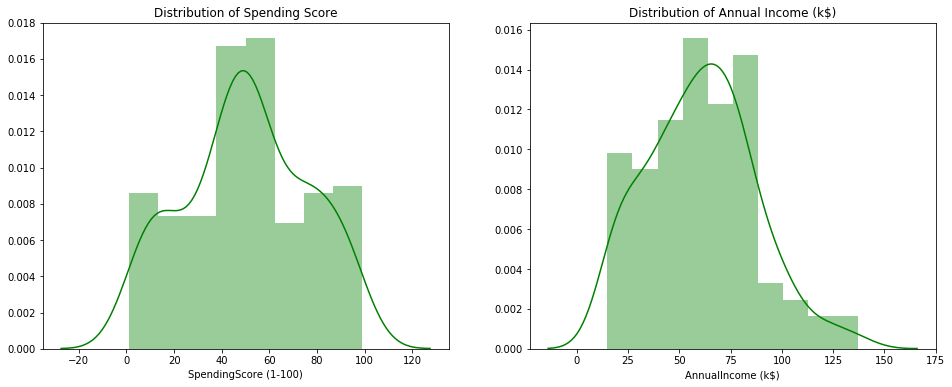

In [40]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.distplot(data['SpendingScore (1-100)'], color = 'green')
plt.title('Distribution of Spending Score')
plt.subplot(1,2,2)
sns.distplot(data['AnnualIncome (k$)'], color = 'green')
plt.title('Distribution of Annual Income (k$)')
plt.show()

E:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


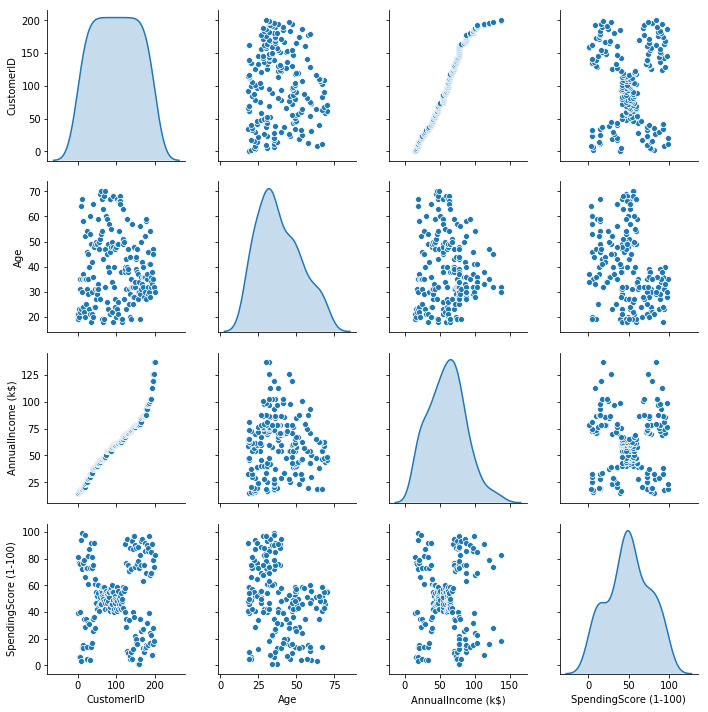

In [41]:
sns.pairplot(data=data, diag_kind="kde")
plt.savefig('Distribution.png', bbox_inches = 'tight')

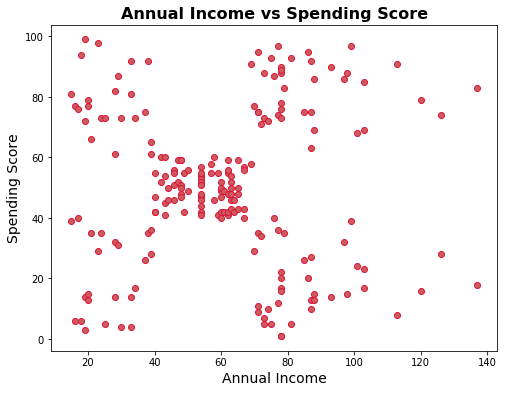

In [42]:
plt.figure(figsize=(8,6))
plt.title('Annual Income vs Spending Score', fontsize = 16, fontweight='bold')  
plt.scatter(data['AnnualIncome (k$)'], data['SpendingScore (1-100)'], color = 'indianred', edgecolors = 'crimson')
plt.xlabel('Annual Income', fontsize = 14)
plt.ylabel('Spending Score', fontsize = 14)
plt.savefig('Annual Income vs Spending Score.png', bbox_inches = 'tight')
plt.show()

Text(0,0.5,'Spending Score')

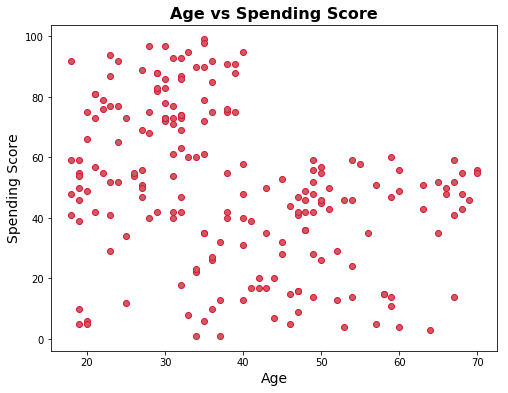

In [43]:
plt.figure(figsize=(8,6))
plt.title('Age vs Spending Score', fontsize = 16, fontweight='bold')  
plt.scatter(data['Age'], data['SpendingScore (1-100)'], color = 'indianred', edgecolors = 'crimson')
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Spending Score', fontsize = 14)

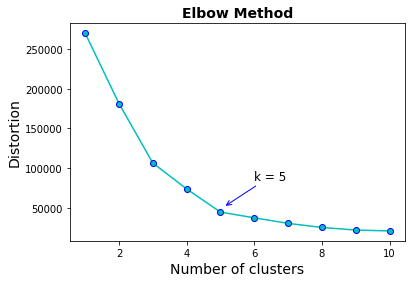

In [44]:
##4. Clustering using K-Means.
##Segmentation using Annual Income and Spending Score
# calculate distortion for a range of number of cluster
X = data[['AnnualIncome (k$)' , 'SpendingScore (1-100)']].iloc[: , :].values
distortions = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.title('Elbow Method', fontsize = 14, fontweight='bold')
plt.plot(range(1, 11), distortions, 'c', marker='o', markeredgecolor = 'b')
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('Distortion', fontsize = 14)
plt.annotate('k = 5', xy=(5.1, 51000), xytext=(6, 85000),fontsize = 12, arrowprops={'arrowstyle': '->', 'color': 'blue'})
plt.savefig('Elbow Method.png', bbox_inches = 'tight')
plt.show()

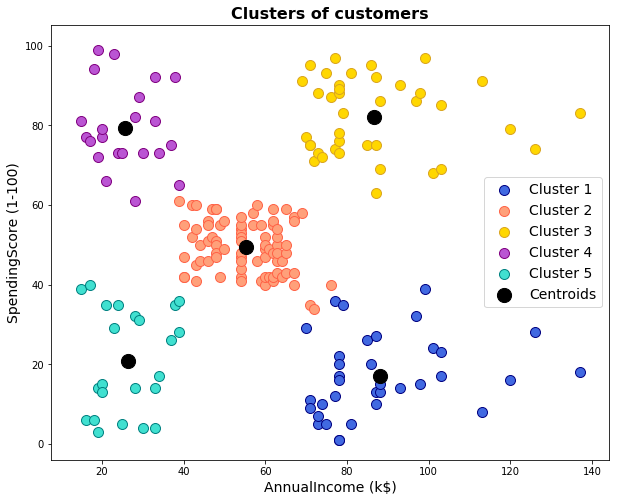

In [45]:
#Now let's execute K-means algorithm with 5 clusters and see the output graph.
kmeans=KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(X)

plt.figure(figsize=(10,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'royalblue', edgecolors = 'navy', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'lightsalmon', edgecolors = 'tomato', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'gold', edgecolors = 'goldenrod', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'mediumorchid', edgecolors = 'purple', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'turquoise', edgecolors = 'teal', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'black', label = 'Centroids')
plt.title('Clusters of customers', fontsize = 16, fontweight='bold')
plt.xlabel('AnnualIncome (k$)', fontsize = 14)
plt.ylabel('SpendingScore (1-100)', fontsize = 14)
plt.legend(fontsize = 14)
plt.savefig('Clusters of customers.png', bbox_inches = 'tight')
plt.show()

In [46]:
##We obteined 5 clusters, each identified with different colors, while the centroids are in black. Now let's examine each cluster.
#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
num_cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset
data['cluster'] = num_cluster

#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(data.groupby('cluster').mean(),1))
kmeans_mean_cluster



,CustomerID,Age,AnnualIncome (k$),SpendingScore (1-100)
cluster,,,,
1,164.4,41.1,88.2,17.1
2,86.3,42.7,55.3,49.5
3,162.0,32.7,86.5,82.1
4,23.1,25.3,25.7,79.4
5,23.0,45.2,26.3,20.9


In [47]:
gender_count_cluster = data[['cluster','Gender', 'CustomerID']].groupby(['cluster','Gender']).count()
gender_count_cluster

CustomerID
cluster Gender            
1       Female          16
        Male            19
2       Female          48
        Male            33
3       Female          21
        Male            18
4       Female          13
        Male             9
5       Female          14
        Male             9

In [48]:
total_cluster = data[['cluster','CustomerID']].groupby(['cluster']).count()
total_cluster

,CustomerID
cluster,
1,35
2,81
3,39
4,22
5,23


In [49]:
def as_perc(value, total):
    return round((value/total)*100,2)

per = gender_count_cluster.apply(as_perc, total = total_cluster['CustomerID'])
per

CustomerID
cluster Gender            
1       Female       45.71
        Male         54.29
2       Female       59.26
        Male         40.74
3       Female       53.85
        Male         46.15
4       Female       59.09
        Male         40.91
5       Female       60.87
        Male         39.13

In [ ]:
##Conclusion.

##The k-means analysis help us to identify what are the consumers that spent more in this supermarket. In this case, we obtain two groups:

####Group 1: cluster 3 with an average spending score of 82.1
####Group 2: cluster 4 with an average spending score of 79.4
##Each of this clusters help us analyze these customers in terms of annual income, age and gender.